In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


# Importing main libraries needed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Reading the data from pandas

In [3]:
data = pd.read_csv("/kaggle/input/customer-personality-analysis/marketing_campaign.csv" , sep='\t')
data.info() #print the datatypes and main information about it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data.head(5) # print the main 5 rows to see the values

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Preprocessing data

## First Preprocessing of People data:

    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise


### Kid Home and Teen home columns

<Axes: >

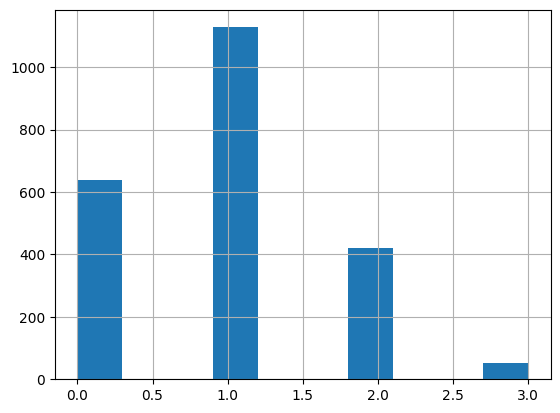

In [5]:
#determine the number of children of the customer
data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(['Kidhome' , 'Teenhome' , 'ID'] , axis = 1 , inplace = True)
data['Children'].hist()

## Martial_statue column

In [6]:
mapdic = {'Together': 'Partner','Married': 'Partner','Divorced': 'Single','Widow': 'Single', 'Alone': 'Single','Absurd': 'Single','YOLO': 'Single'}
data['Marital_Status'] = data['Marital_Status'].map(mapdic)

### Dt_Customer column

In [7]:
# convert the column into datetime datatype not string 
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'] , format='mixed')  
data.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue                       int64
Response                        int64
Children    

### Income Column cleaning

In [8]:
data.isnull().sum()

Year_Birth               0
Education                0
Marital_Status         480
Income                  24
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
Children                 0
dtype: int64

In [9]:
data['Income'].describe() #print the main mathematical information about column income

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [10]:
px.scatter(data , x = 'Income')

In [11]:
#fill null values with the median value
data['Income'] = data['Income'].fillna(data['Income'].median())
data['Income'].isnull().sum() #dat column is now clean

0

In [12]:
data.isnull().sum()

Year_Birth               0
Education                0
Marital_Status         480
Income                   0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
Children                 0
dtype: int64

### Age column

<Axes: xlabel='Year_Birth'>

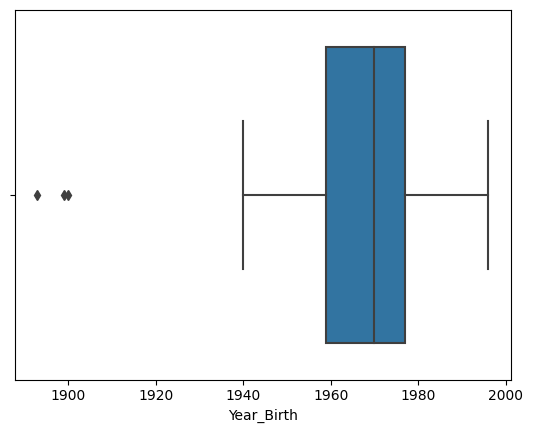

In [13]:
sns.boxplot(data , x = 'Year_Birth')

In [14]:
data['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [15]:
from datetime import date
current_date = date.today()
current_year = current_date.year
data['Age'] = current_year - data['Year_Birth']

data.loc[data['Year_Birth']<=1893, 'Year'] = 0
data.loc[data['Year_Birth'].between(1893,1959), 'Year'] = 1
data.loc[data['Year_Birth'].between(1959,1970), 'Year'] = 2
data.loc[data['Year_Birth'].between(1970,1977), 'Year'] = 3
data.loc[data['Year_Birth']>= 1977, 'Year'] = 4

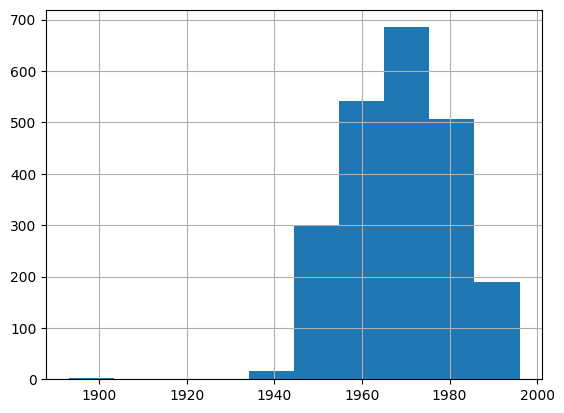

In [16]:
data['Year_Birth'].hist();

In [17]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Children', 'Age',
       'Year'],
      dtype='object')

## Second Preprocessing of Products data:

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years


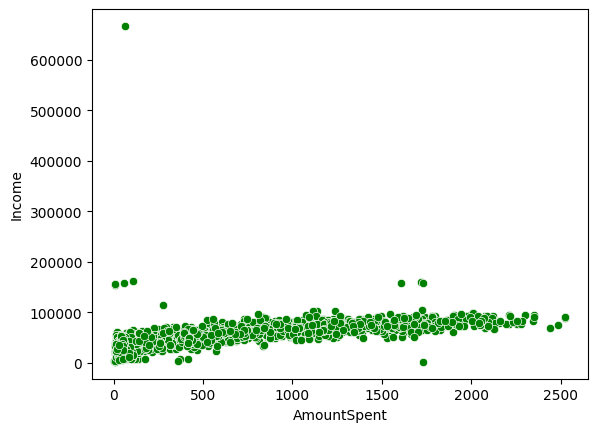

In [18]:
data['AmountSpent'] = data['MntWines'] + data['MntFruits']+ data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
sns.scatterplot(data , x = 'AmountSpent' , y = 'Income' , color = 'green'); #linear relationship

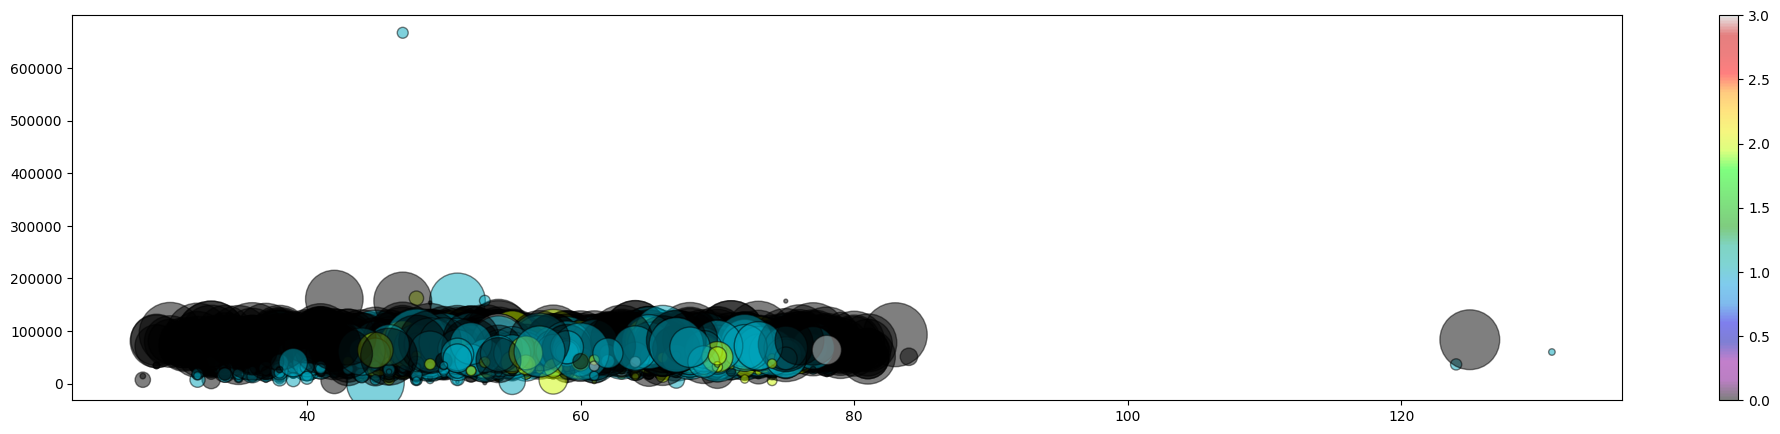

In [19]:
fig, axes = plt.subplots(figsize=(25, 5))
colors = data['Children']
sizes = data['AmountSpent']
plt.scatter(x = data['Age'] ,y = data["Income"] ,cmap='nipy_spectral' , c = colors , alpha = 0.5 , s=sizes , edgecolor='black');
plt.colorbar()
plt.show()

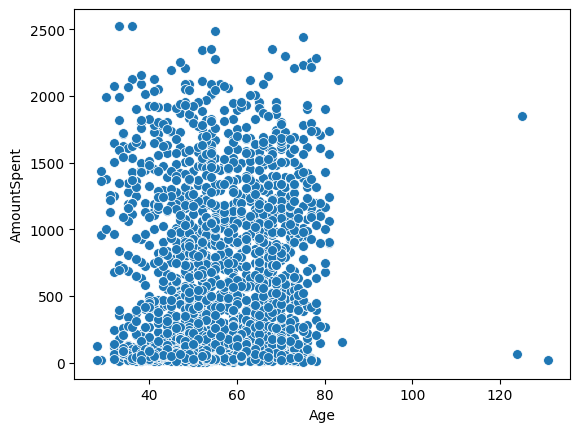

In [20]:
sns.scatterplot(x=data['Age'], y=data['AmountSpent'], s=50);

In [21]:
data = data.drop(['MntWines',
'MntFruits',
'MntMeatProducts',
'MntFishProducts',
'MntSweetProducts',
'MntGoldProds'
] , axis = 1)

In [22]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Children', 'Age', 'Year', 'AmountSpent'],
      dtype='object')

## Third Preprocessing of Promotion data:

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

Text(0.5, 1.0, 'AcceptedCmp1')

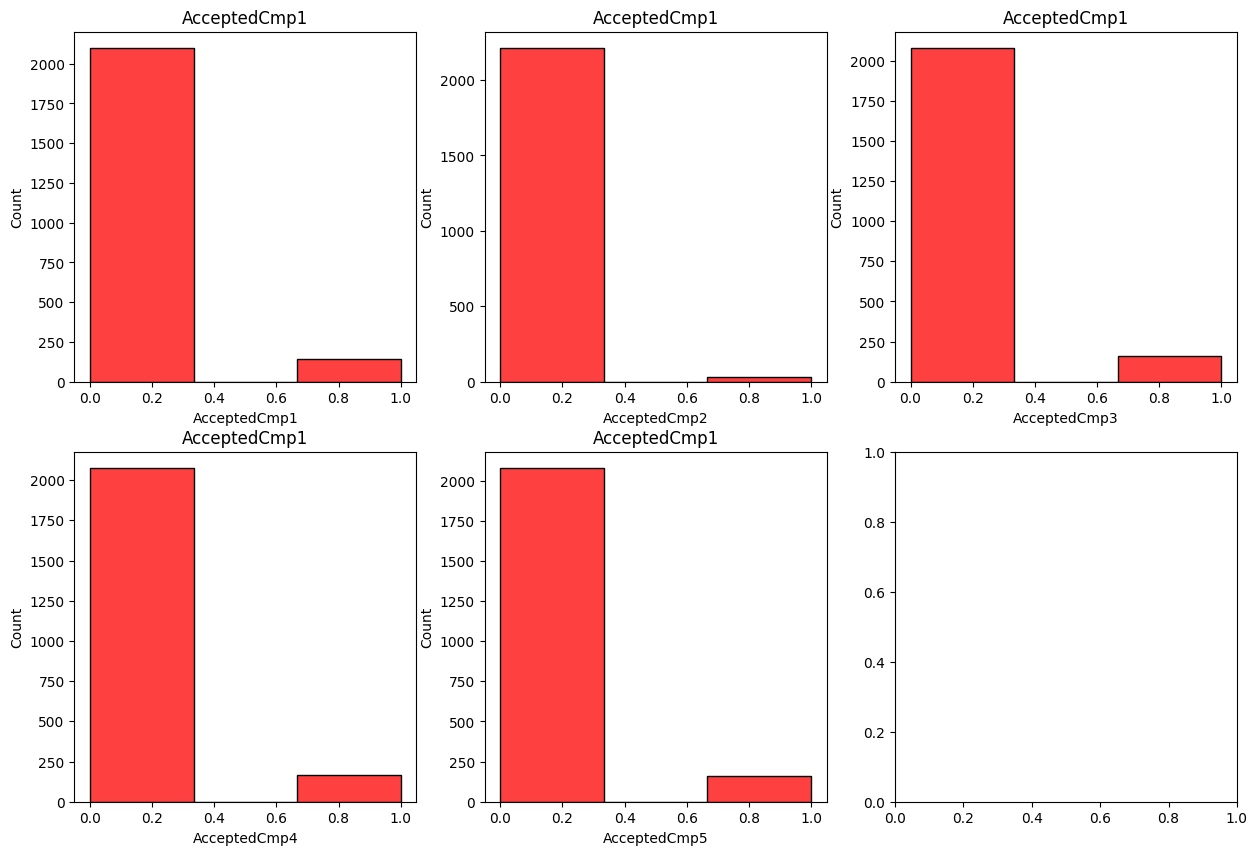

In [23]:
fig, axes = plt.subplots(2, 3 , figsize=(15, 10))

sns.histplot(ax=axes[0, 0], data=data, x='AcceptedCmp1' , color = 'red' , bins = 3)
axes[0 , 0].set_title('AcceptedCmp1')
sns.histplot(ax=axes[0, 1], data=data, x='AcceptedCmp2' , color = 'red', bins = 3)
axes[0 , 1].set_title('AcceptedCmp1')
sns.histplot(ax=axes[0, 2], data=data, x='AcceptedCmp3' , color = 'red', bins = 3)
axes[0 , 2].set_title('AcceptedCmp1')
sns.histplot(ax=axes[1, 0], data=data, x='AcceptedCmp4' , color = 'red', bins = 3)
axes[1 , 0].set_title('AcceptedCmp1')
sns.histplot(ax=axes[1, 1], data=data, x='AcceptedCmp5' , color = 'red', bins = 3)
axes[1 , 1].set_title('AcceptedCmp1')

In [24]:
data['AcceptedCmp'] = data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']

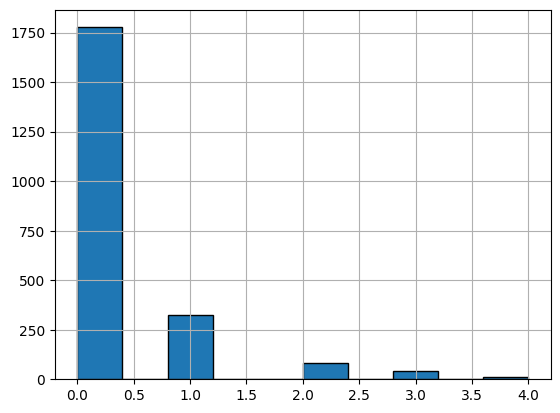

In [25]:
data['AcceptedCmp'].hist(edgecolor='black')
plt.show()

In [26]:
data = data.drop(['AcceptedCmp1' , 'AcceptedCmp2' , 'AcceptedCmp3' , 'AcceptedCmp4' , 'AcceptedCmp5'] , axis = 1)
data.head(5)

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,Year,AmountSpent,AcceptedCmp
0,1957,Graduation,NaN,58138.0,2012-04-09,58,3,8,10,4,7,0,3,11,1,0,67,1.0,1617,0
1,1954,Graduation,NaN,46344.0,2014-08-03,38,2,1,1,2,5,0,3,11,0,2,70,1.0,27,0
2,1965,Graduation,Partner,71613.0,2013-08-21,26,1,8,2,10,4,0,3,11,0,0,59,2.0,776,0
3,1984,Graduation,Partner,26646.0,2014-10-02,26,2,2,0,4,6,0,3,11,0,1,40,4.0,53,0
4,1981,PhD,Partner,58293.0,2014-01-19,94,5,5,3,6,5,0,3,11,0,1,43,4.0,422,0


## Fourth Preprocessing of Place data:

    NumWebPurchases: Number of purchases made through the company’s website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s website in the last month


Text(0.5, 1.0, 'NumStorePurchases')

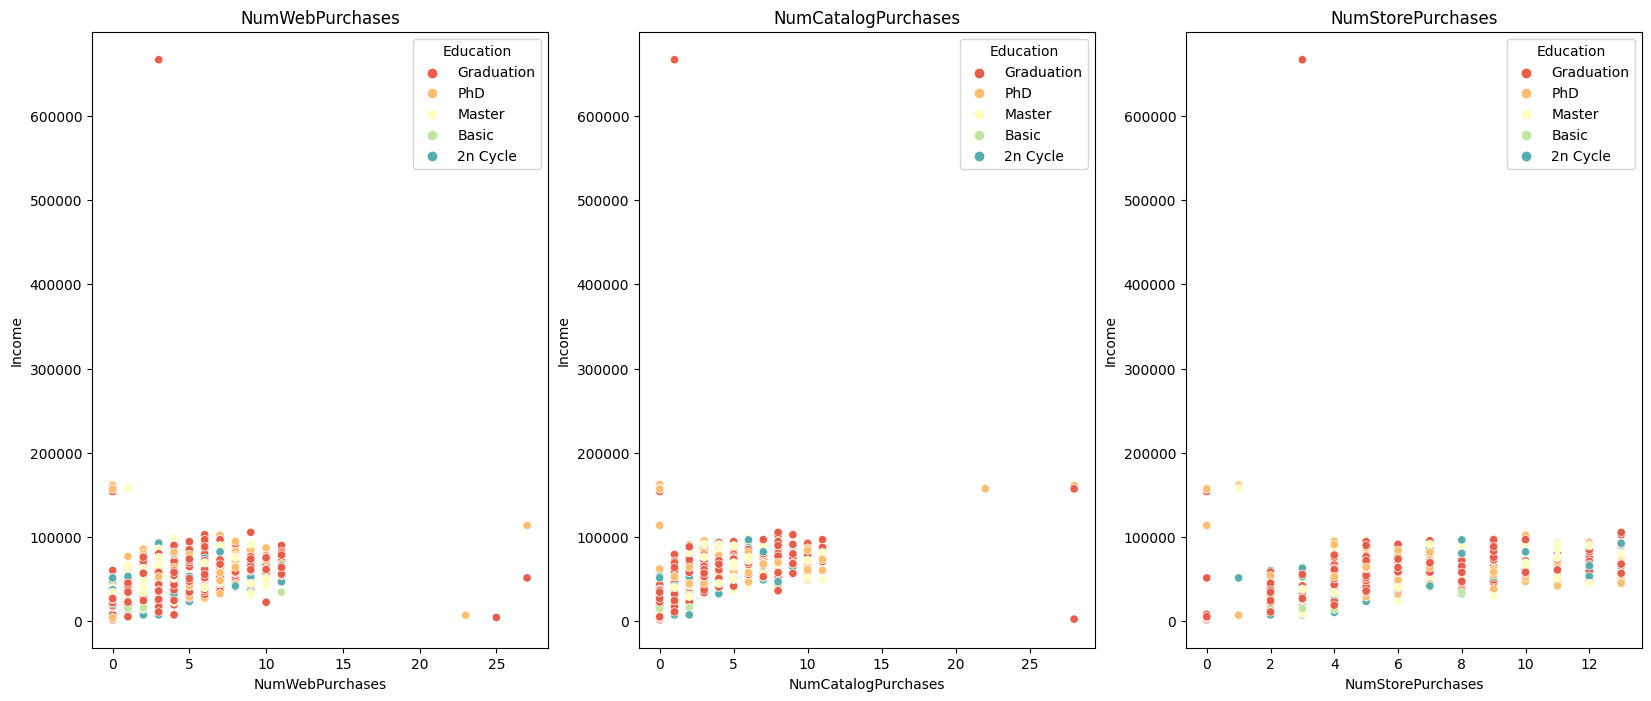

In [27]:
palette="Spectral"
fig, axes = plt.subplots(1, 3 , figsize=(20, 8))

sns.scatterplot(ax=axes[0], data=data, x='NumWebPurchases' , y= 'Income' , palette = palette, hue = 'Education')
axes[0].set_title('NumWebPurchases')
sns.scatterplot(ax=axes[1], data=data, x='NumCatalogPurchases', y= 'Income' , palette = palette, hue = 'Education')
axes[1].set_title('NumCatalogPurchases')
sns.scatterplot(ax=axes[2], data=data, x='NumStorePurchases', y= 'Income' ,  palette = palette, hue = 'Education')
axes[2].set_title('NumStorePurchases')

Text(0.5, 1.0, 'NumStorePurchases')

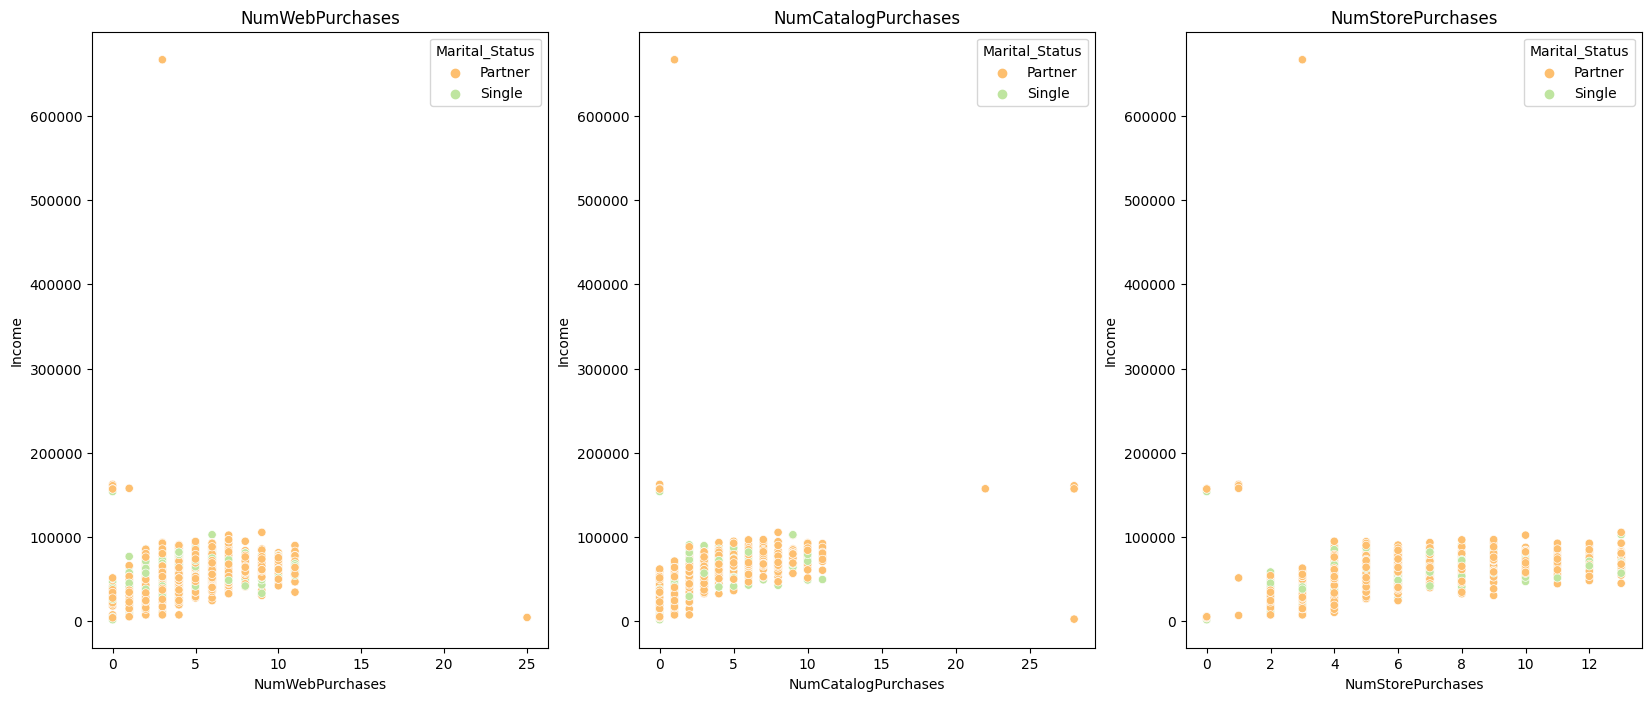

In [28]:
palette="Spectral"
fig, axes = plt.subplots(1, 3 , figsize=(20, 8))

sns.scatterplot(ax=axes[0], data=data, x='NumWebPurchases' , y= 'Income' , palette = palette, hue = 'Marital_Status')
axes[0].set_title('NumWebPurchases')
sns.scatterplot(ax=axes[1], data=data, x='NumCatalogPurchases', y= 'Income' , palette = palette, hue = 'Marital_Status')
axes[1].set_title('NumCatalogPurchases')
sns.scatterplot(ax=axes[2], data=data, x='NumStorePurchases', y= 'Income' ,  palette = palette, hue = 'Marital_Status')
axes[2].set_title('NumStorePurchases')

<Axes: >

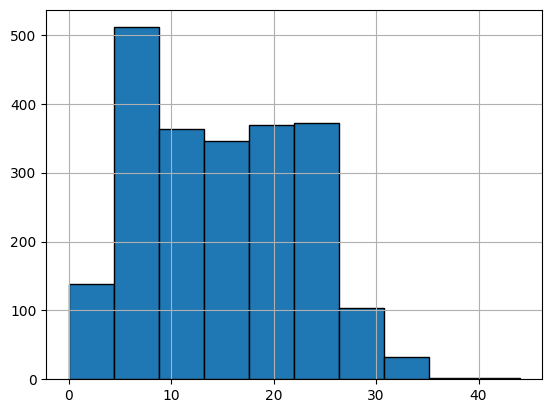

In [29]:
data['NumPurchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data = data.drop(['NumStorePurchases' , 'NumDealsPurchases' , 'NumWebPurchases' , 'NumCatalogPurchases'] ,axis = 1)
data['NumPurchases'].hist(edgecolor='black')

## Outliers in the data

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year_Birth         2240 non-null   int64         
 1   Education          2240 non-null   object        
 2   Marital_Status     1760 non-null   object        
 3   Income             2240 non-null   float64       
 4   Dt_Customer        2240 non-null   datetime64[ns]
 5   Recency            2240 non-null   int64         
 6   NumWebVisitsMonth  2240 non-null   int64         
 7   Complain           2240 non-null   int64         
 8   Z_CostContact      2240 non-null   int64         
 9   Z_Revenue          2240 non-null   int64         
 10  Response           2240 non-null   int64         
 11  Children           2240 non-null   int64         
 12  Age                2240 non-null   int64         
 13  Year               2240 non-null   float64       
 14  AmountSp

In [31]:
data.head(5)

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,Year,AmountSpent,AcceptedCmp,NumPurchases
0,1957,Graduation,NaN,58138.0,2012-04-09,58,7,0,3,11,1,0,67,1.0,1617,0,25
1,1954,Graduation,NaN,46344.0,2014-08-03,38,5,0,3,11,0,2,70,1.0,27,0,6
2,1965,Graduation,Partner,71613.0,2013-08-21,26,4,0,3,11,0,0,59,2.0,776,0,21
3,1984,Graduation,Partner,26646.0,2014-10-02,26,6,0,3,11,0,1,40,4.0,53,0,8
4,1981,PhD,Partner,58293.0,2014-01-19,94,5,0,3,11,0,1,43,4.0,422,0,19


Text(0.5, 1.0, 'NumPurchases')

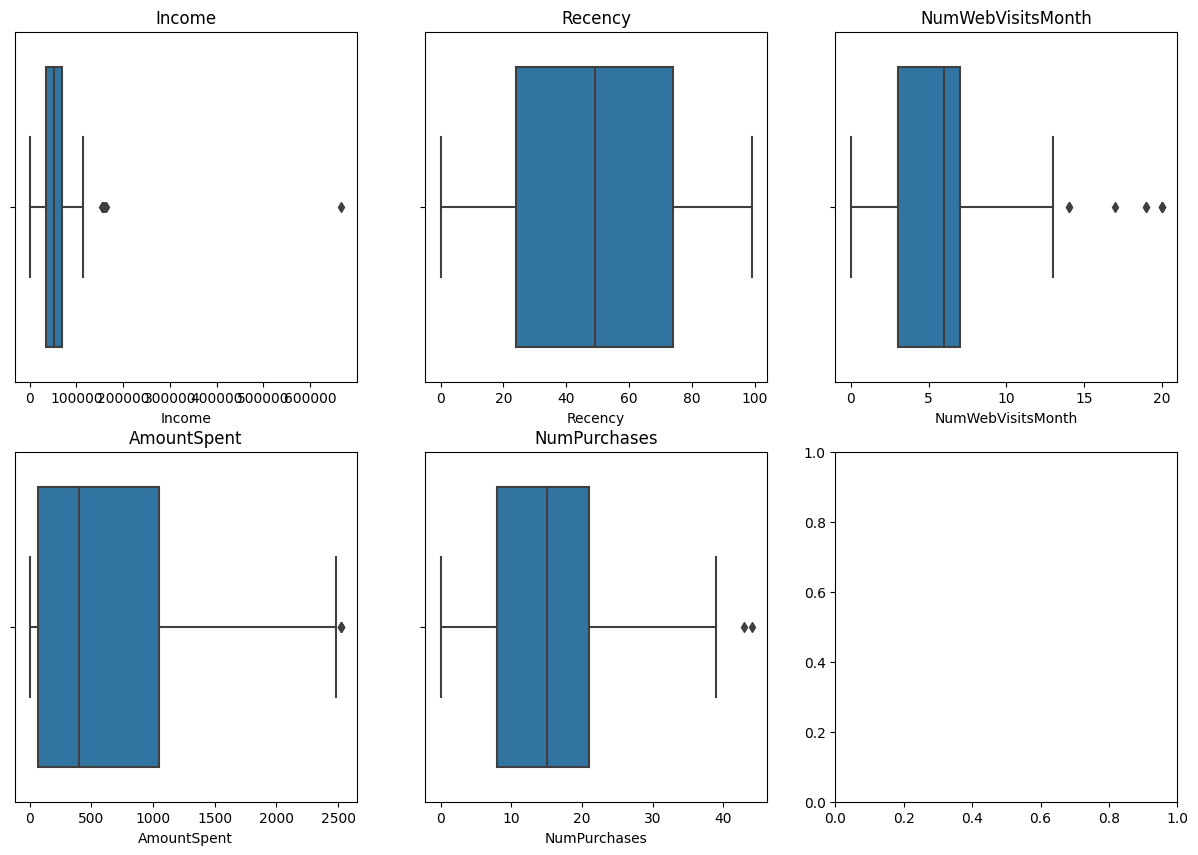

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=data, x='Income')
axes[0 , 0].set_title('Income')
sns.boxplot(ax=axes[0, 1], data=data, x='Recency')
axes[0 , 1].set_title('Recency')
sns.boxplot(ax=axes[0, 2], data=data, x='NumWebVisitsMonth')
axes[0 , 2].set_title('NumWebVisitsMonth')
sns.boxplot(ax=axes[1, 0], data=data, x='AmountSpent')
axes[1 , 0].set_title('AmountSpent')
sns.boxplot(ax=axes[1, 1], data=data, x='NumPurchases')
axes[1 , 1].set_title('NumPurchases')

# Data Preparing for modeling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.cluster import KMeans

km5 = KMeans(n_clusters= 5, init='k-means++', n_init='auto', random_state=0)
y_pred = km5.fit_predict(X)